In [10]:
# imports 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
import glob
import os
import h5_utilities_module as h5u
import pingouin as pg


In [3]:
# get all the files in the directory
datadir = '/Users/thomaselston/Documents/PYTHON/self_control/raw_data/'
data_files = glob.glob(os.path.join(datadir, '*.h5'))
file_names = [os.path.basename(file) for file in data_files]

In [4]:
# list contents of a raw file
h5u.list_hdf5_data(data_files[0])

Datasets in '/Users/thomaselston/Documents/PYTHON/self_control/raw_data/K20240707_Rec06.h5':
CdN_FR
CdN_channels
CdN_locations
CdN_mean_wf
CdN_u_names
CdN_zFR
OFC_FR
OFC_channels
OFC_locations
OFC_mean_wf
OFC_u_names
OFC_zFR
bhv
chan_map
ts


In [5]:
# initialize arrays to accumulate results into
count_array = np.zeros((len(data_files), 3)) # columns are: subject, ofc, cdn

# loop over each file and count how many neurons were in each brain area
for f_num, this_file in enumerate(data_files):
    
    # which subject is this?
    if 'D' in Path(this_file).stem:
        s = 0
    else:
        s = 1

    count_array[f_num, 0] = s
    count_array[f_num, 1] = len(h5u.pull_from_h5(this_file, 'OFC_u_names'))
    count_array[f_num, 2] = len(h5u.pull_from_h5(this_file, 'CdN_u_names'))

In [36]:
# create a set of arrays for the x axis coordinates
k_ix_sum = np.sum(k_ix)

ofc_x = np.ones((k_ix_sum, 1))  # Shape (k_ix_sum, 1)
cdn_x = np.ones((k_ix_sum, 1)) * 2  # Shape (k_ix_sum, 1)

# Concatenate along axis=1 (horizontally)
x_vals = np.concatenate((ofc_x, cdn_x), axis=1)

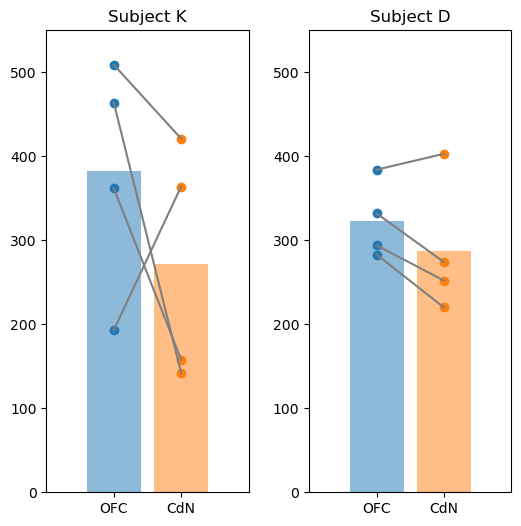

In [46]:
k_ix = count_array[:,0] == 1
d_ix = count_array[:,0] == 0

k_ofc_mean = np.mean(count_array[k_ix, 1])
k_cdn_mean = np.mean(count_array[k_ix, 2])

d_ofc_mean = np.mean(count_array[d_ix, 1])
d_cdn_mean = np.mean(count_array[d_ix, 2])

# create a set of arrays for the x axis coordinates
k_ix_sum = np.sum(k_ix)

ofc_x = np.ones((k_ix_sum, 1))  # Shape (k_ix_sum, 1)
cdn_x = np.ones((k_ix_sum, 1)) * 2  # Shape (k_ix_sum, 1)

# Concatenate horizontally
x_vals = np.concatenate((ofc_x, cdn_x), axis=1)
k_counts = np.concatenate((count_array[k_ix, 1].reshape(-1, 1), 
                           count_array[k_ix, 2].reshape(-1, 1)), axis=1)

d_counts = np.concatenate((count_array[d_ix, 1].reshape(-1, 1), 
                           count_array[d_ix, 2].reshape(-1, 1)), axis=1)


# now plot
fig, ax = plt.subplots(1,2, figsize = (6, 6))
plt.subplots_adjust(wspace=0.3, hspace=0.4)  # add some white space

ax[0].bar(1, k_ofc_mean, color = 'tab:blue', alpha = .5)
ax[0].bar(2, k_cdn_mean, color = 'tab:orange', alpha = .5)
ax[0].scatter(x_vals[:,0], k_counts[:, 0], color='tab:blue')
ax[0].scatter(x_vals[:,1], k_counts[:, 1], color='tab:orange')
ax[0].plot(x_vals.T, k_counts.T, color='tab:gray')
ax[0].set_ylim((0, 550))
ax[0].set_xlim((0, 3))
ax[0].set_xticks((1,2))
ax[0].set_xticklabels(('OFC', 'CdN'))
ax[0].set_title('Subject K')


ax[1].bar(1, d_ofc_mean, color = 'tab:blue', alpha = .5)
ax[1].bar(2, d_cdn_mean, color = 'tab:orange', alpha = .5)
ax[1].scatter(x_vals[:,0], d_counts[:, 0], color='tab:blue')
ax[1].scatter(x_vals[:,1], d_counts[:, 1], color='tab:orange')
ax[1].plot(x_vals.T, d_counts.T, color='tab:gray')
ax[1].set_ylim((0, 550))
ax[1].set_xlim((0, 3))
ax[1].set_xticks((1,2))
ax[1].set_xticklabels(('OFC', 'CdN'))
ax[1].set_title('Subject D')


plt.savefig("Neuron_counts.svg")


